Objective: Make a selection of nine paintings for the exhibition catalogue to be selected from Wikidata and rendered multi-format in Quarto.

The below Python code uses SPARQLWrapper to retrieve data from Wikidata based on a SPARQL query.

In [1]:
!pip install SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

In [5]:
# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Paintings_conference_bot/0.0 (https://github.com/Pgxe9zu1/catalogue-003; lisa.sommer@stud.hs-hannover.de)'

# SPARQL query
# see in Wikidata's Query Service GUI at:
# https://w.wiki/6aKR
query = """
#defaultView:ImageGrid
SELECT ?instance_of ?title ?creatorLabel ?inception ?inventory_number ?made_from_materialLabel ?image ?copyright_statusLabel 
WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }
  ?instance_of wdt:P31 wd:Q3305213;
    wdt:P195 wd:Q162111.
  ?instance_of wdt:P18 ?image.
  ?instance_of wdt:P1476 ?title.
  ?instance_of wdt:P170 ?creator.
  ?instance_of wdt:P571 ?inception.
  ?instance_of wdt:P186 ?made_from_material.
  ?instance_of wdt:P6216 ?copyright_status.
  ?instance_of wdt:P217 ?inventory_number.
}
# limit to nine results
LIMIT 9
"""


In [6]:
# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)


Wikidata link: [http://www.wikidata.org/entity/Q50105834](http://www.wikidata.org/entity/Q50105834)

Title: Das blaue Zimmer

Creator: Gotthardt Kuehl

Year: 1900-01-01T00:00:00Z

Inventory number: A III 518

Copyright: Gemeinfreiheit

Material: Ölfarbe



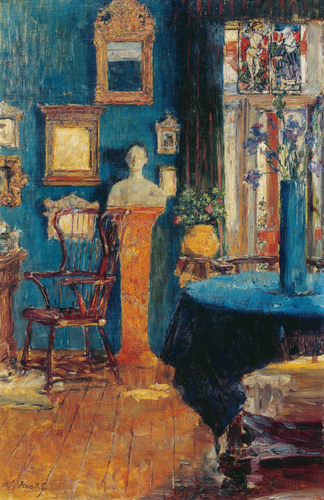




Wikidata link: [http://www.wikidata.org/entity/Q50105834](http://www.wikidata.org/entity/Q50105834)

Title: Das blaue Zimmer

Creator: Gotthardt Kuehl

Year: 1900-01-01T00:00:00Z

Inventory number: A III 518

Copyright: Gemeinfreiheit

Material: Paneel



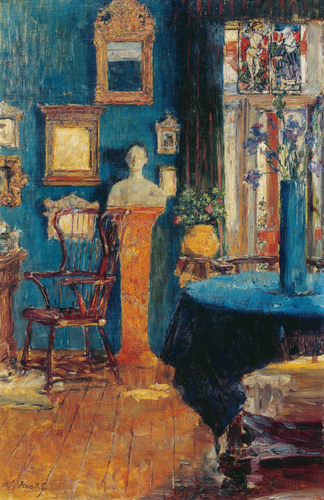




Wikidata link: [http://www.wikidata.org/entity/Q50106027](http://www.wikidata.org/entity/Q50106027)

Title: Mondschein über der Friedrichsgracht im alten Berlin

Creator: Adolph von Menzel

Year: 1855-01-01T00:00:00Z

Inventory number: A II 150

Copyright: Gemeinfreiheit

Material: Ölfarbe



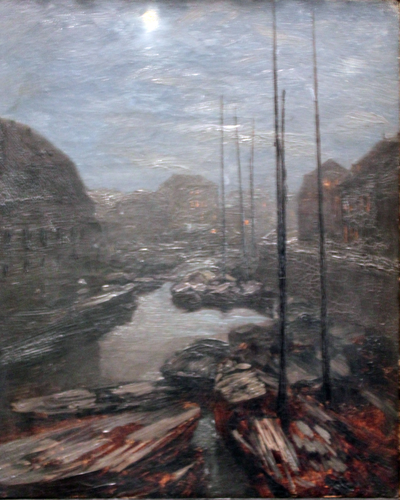




Wikidata link: [http://www.wikidata.org/entity/Q50106027](http://www.wikidata.org/entity/Q50106027)

Title: Mondschein über der Friedrichsgracht im alten Berlin

Creator: Adolph von Menzel

Year: 1855-01-01T00:00:00Z

Inventory number: A II 150

Copyright: Gemeinfreiheit

Material: Leinwand



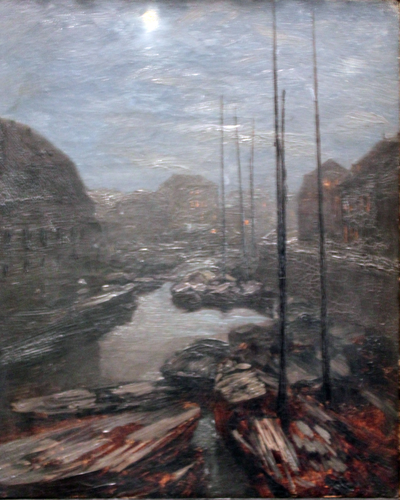




Wikidata link: [http://www.wikidata.org/entity/Q50106098](http://www.wikidata.org/entity/Q50106098)

Title: Parade in Potsdam im Jahre 1817

Creator: Franz Krüger

Year: 1848-01-01T00:00:00Z

Inventory number: A II 649

Copyright: Gemeinfreiheit

Material: Ölfarbe



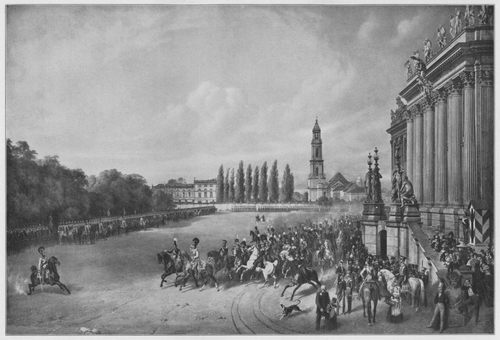




Wikidata link: [http://www.wikidata.org/entity/Q50106098](http://www.wikidata.org/entity/Q50106098)

Title: Parade in Potsdam im Jahre 1817

Creator: Franz Krüger

Year: 1848-01-01T00:00:00Z

Inventory number: A II 649

Copyright: Gemeinfreiheit

Material: Leinwand



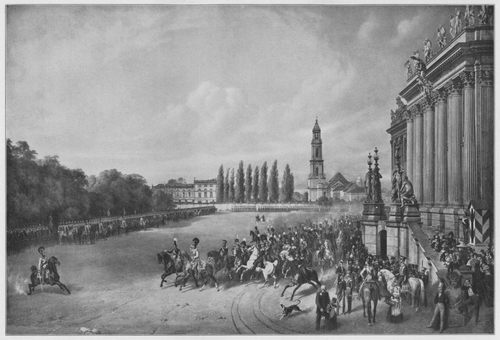




Wikidata link: [http://www.wikidata.org/entity/Q50104895](http://www.wikidata.org/entity/Q50104895)

Title: Römische Vigna

Creator: Franz Ludwig Catel

Year: 1833-01-01T00:00:00Z

Inventory number: A I 215

Copyright: Gemeinfreiheit

Material: Ölfarbe



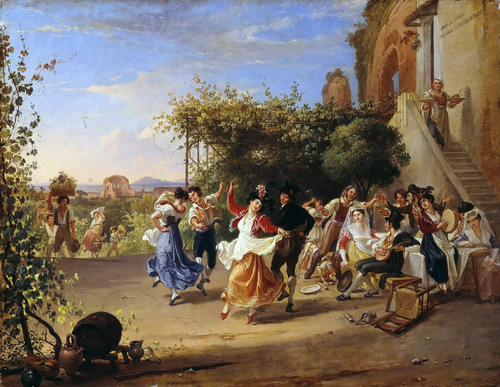




Wikidata link: [http://www.wikidata.org/entity/Q50104895](http://www.wikidata.org/entity/Q50104895)

Title: Römische Vigna

Creator: Franz Ludwig Catel

Year: 1833-01-01T00:00:00Z

Inventory number: A I 215

Copyright: Gemeinfreiheit

Material: Leinwand



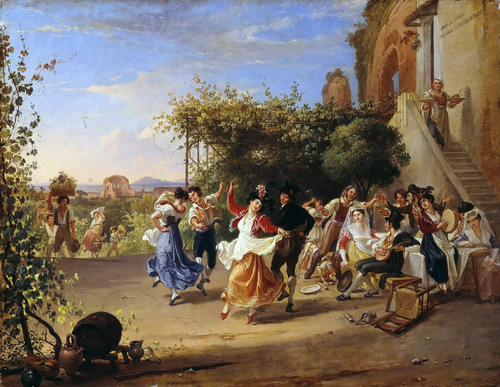




Wikidata link: [http://www.wikidata.org/entity/Q50104929](http://www.wikidata.org/entity/Q50104929)

Title: Bildnis des Komponisten Carl Maria von Weber

Creator: Caroline Bardua

Year: 1821-01-01T00:00:00Z

Inventory number: A II 352

Copyright: Gemeinfreiheit

Material: Ölfarbe



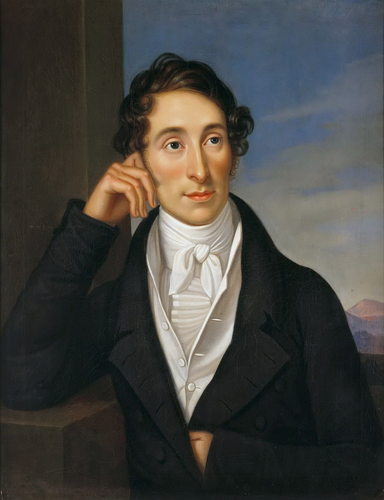

In [8]:
# MAIN PROGRAM

# create SPARQL query
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)

# retrieve results and convert to JSON format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

# for each result, print various data fields
for instance_of in result['results']['bindings']:
    print('Wikidata link: ' + '[' + instance_of['instance_of']['value'] + ']' + '(' + instance_of['instance_of']['value'] + ')' + '\n')
    print('Title: ' + instance_of['title']['value'] + '\n')
    print('Creator: ' + instance_of['creatorLabel']['value'] + '\n')
    print('Year: ' + instance_of['inception']['value'] + '\n')
    print('Inventory number: ' + instance_of['inventory_number']['value'] + '\n')
    print('Copyright: ' + instance_of['copyright_statusLabel']['value'] + '\n')
    print('Material: ' + instance_of['made_from_materialLabel']['value'] + '\n')
    
    # get image from image URL and display resized version
    image_url=instance_of['image']['value']
    headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/Pgxe9zu1/catalogue-003; lisa.sommer@stud.hs-hannover.de)'}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')